In [34]:
#

In [2]:
import pandas as pd

buses = pd.read_csv('bus_kMean_ready.csv')
print ("converted form csv:")
print (buses)


converted form csv:
     TID   Time
0      1  22557
1      2  23138
2      3  23212
3      4  23215
4      5  23260
..   ...    ...
484  485  78081
485  486  78824
486  487  78834
487  488  79405
488  489  79876

[489 rows x 2 columns]


buses_numpy: 
 [[    1 22557]
 [    2 23138]
 [    3 23212]
 [    4 23215]
 [    5 23260]
 [    6 23289]
 [    7 23303]
 [    8 23491]
 [    9 23608]
 [   10 23611]
 [   11 23714]
 [   12 23791]
 [   13 23793]
 [   14 24120]
 [   15 24296]
 [   16 24298]
 [   17 24669]
 [   18 24862]
 [   19 25010]
 [   20 25187]
 [   21 26255]
 [   22 26672]
 [   23 26856]
 [   24 27163]
 [   25 27260]
 [   26 27314]
 [   27 27364]
 [   28 27367]
 [   29 27437]
 [   30 27441]
 [   31 27524]
 [   32 27583]
 [   33 27658]
 [   34 27661]
 [   35 27759]
 [   36 27804]
 [   37 27805]
 [   38 27810]
 [   39 27964]
 [   40 28216]
 [   41 28302]
 [   42 28304]
 [   43 28305]
 [   44 28310]
 [   45 28312]
 [   46 28313]
 [   47 28315]
 [   48 28319]
 [   49 28319]
 [   50 28411]
 [   51 28413]
 [   52 28474]
 [   53 28541]
 [   54 28609]
 [   55 28613]
 [   56 28662]
 [   57 28759]
 [   58 28823]
 [   59 28827]
 [   60 29074]
 [   61 29406]
 [   62 29493]
 [   63 29509]
 [   64 30893]
 [   65 30937]
 [   66 31

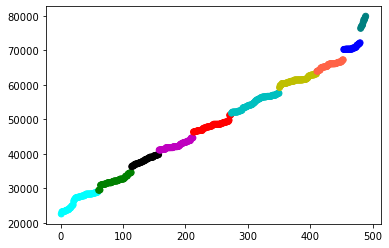

In [33]:
#Kmean Algorithms
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
#df= np.array([[1,3],[3,3],[4,3],[5,3],[1,2],[4,2],[1,1],[2,1]])
buses_numpy = buses.to_numpy()
buses_numpy[0]

print('buses_numpy: \n',buses_numpy)
kmeans = KMeans(n_clusters=10).fit(buses_numpy)

print(kmeans.labels_)

colors = np.array(['r','b','g','y','k','c','m','tomato','cyan','teal'])


plt.scatter(X[:,0],X[:,1] , color = colors[kmeans.labels_])